# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)

# Load Data

In [3]:
df = pd.read_csv('data/M1_final.csv')
df_0 = df.copy()

# Clean Dataset

## Drop NaN

In [4]:
print(df.shape)
df = df.dropna(axis=0)
print(df.shape)

(28820, 23)
(28818, 23)


## Numerical cols

In [5]:
df_num = df.loc[:, df.dtypes != np.object]
df_num.shape

(28818, 17)

## Categorical cols

In [6]:
df_cat = df.loc[:, df.dtypes == np.object]
df_cat.shape

(28818, 6)

# Data Exploration

## Num cols

In [7]:
df_num.head()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,DEP_TIME_M,CRS_ARR_M,Temperature,Humidity,Wind Speed,Wind Gust,Pressure,sch_dep,sch_arr,TAXI_OUT
0,11,1,5,-1,124,636,324,323,448,48,58,25,38,29.86,9,17,14
1,11,1,5,-7,371,2475,340,333,531,48,58,25,38,29.86,9,17,15
2,11,1,5,40,181,1069,301,341,482,48,58,25,38,29.86,9,17,22
3,11,1,5,-2,168,944,345,343,513,48,58,25,38,29.86,9,17,12
4,11,1,5,-4,139,760,360,356,499,46,58,24,35,29.91,9,17,13


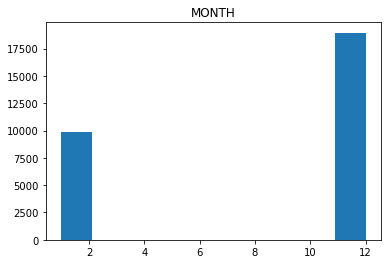

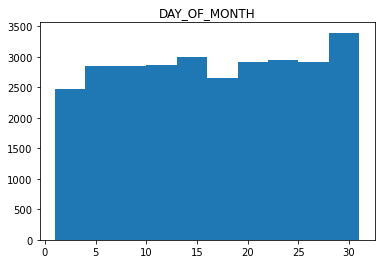

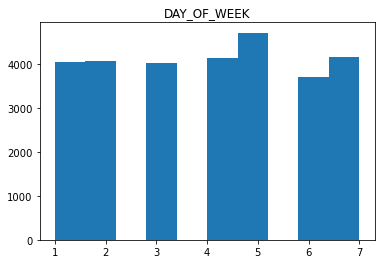

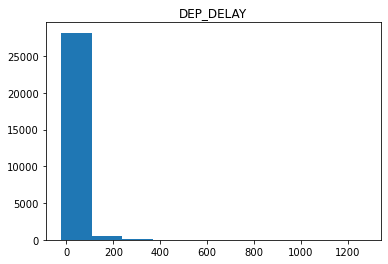

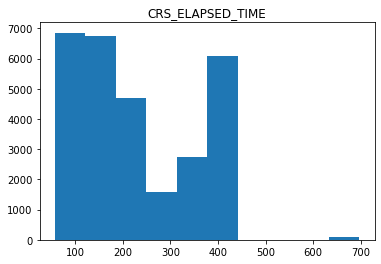

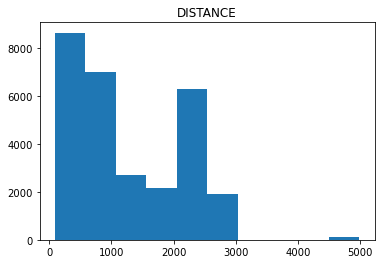

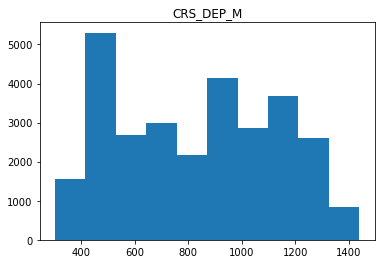

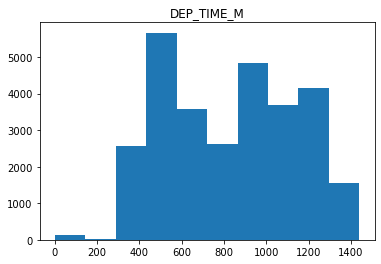

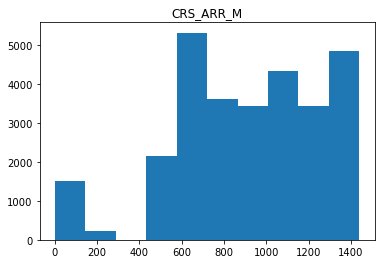

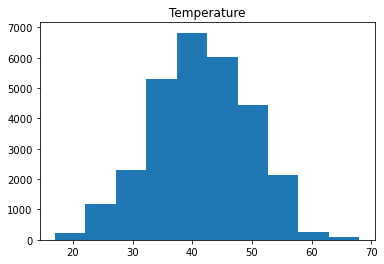

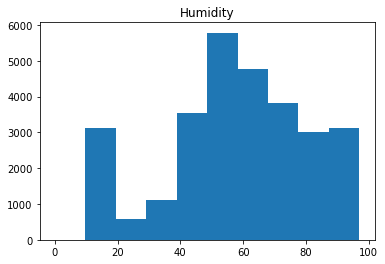

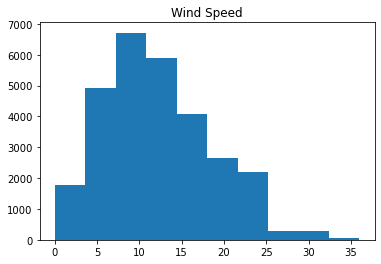

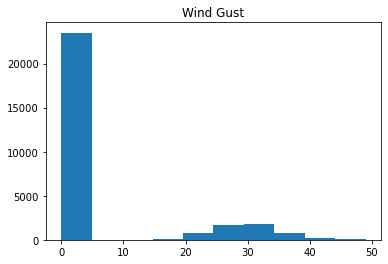

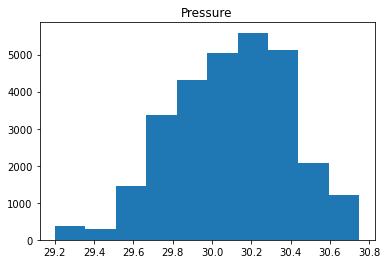

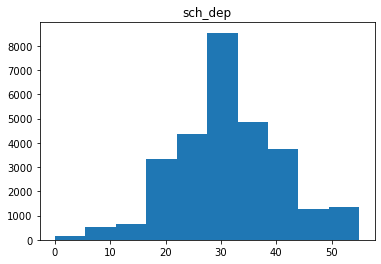

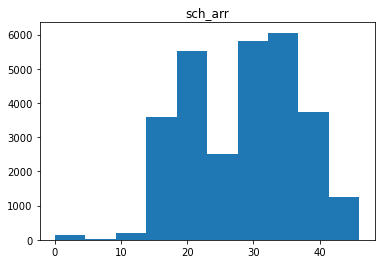

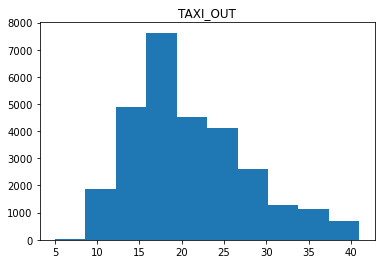

In [11]:
for i in df_num:
    plt.figure()
    plt.hist(df_num[i])
    plt.title(i)
    plt.show();


In [12]:
df_num['MONTH'].unique()

array([11, 12,  1])

In [13]:
df_num['DEP_DELAY'].describe()

count    28818.000000
mean         6.373239
std         38.735195
min        -22.000000
25%         -6.000000
50%         -3.000000
75%          2.000000
max       1276.000000
Name: DEP_DELAY, dtype: float64

<AxesSubplot:>

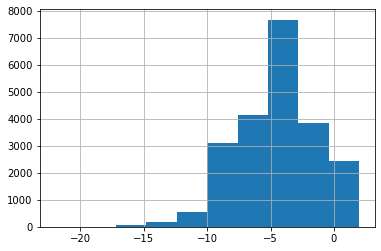

In [39]:
df_num['DEP_DELAY'].hist(range=[-22,2])

In [36]:
np.sort(df_num['DEP_DELAY'].unique())

array([ -22,  -20,  -19,  -18,  -17,  -16,  -15,  -14,  -13,  -12,  -11,
        -10,   -9,   -8,   -7,   -6,   -5,   -4,   -3,   -2,   -1,    0,
          1,    2,    3,    4,    5,    6,    7,    8,    9,   10,   11,
         12,   13,   14,   15,   16,   17,   18,   19,   20,   21,   22,
         23,   24,   25,   26,   27,   28,   29,   30,   31,   32,   33,
         34,   35,   36,   37,   38,   39,   40,   41,   42,   43,   44,
         45,   46,   47,   48,   49,   50,   51,   52,   53,   54,   55,
         56,   57,   58,   59,   60,   61,   62,   63,   64,   65,   66,
         67,   68,   69,   70,   71,   72,   73,   74,   75,   76,   77,
         78,   79,   80,   81,   82,   83,   84,   85,   86,   87,   88,
         89,   90,   91,   92,   93,   94,   95,   96,   97,   98,   99,
        100,  101,  102,  103,  104,  105,  106,  107,  108,  109,  110,
        111,  112,  113,  114,  115,  116,  117,  118,  119,  120,  121,
        122,  123,  124,  125,  126,  127,  128,  1

<AxesSubplot:>

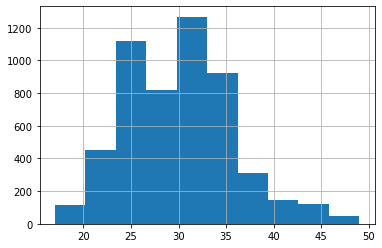

In [46]:
df_num['Wind Gust'].hist(range=[17,49])

In [41]:
df_num['Wind Gust'].describe()

count    28818.000000
mean         5.535707
std         11.886780
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         49.000000
Name: Wind Gust, dtype: float64

In [43]:
np.sort(df_num['Wind Gust'].unique())

array([ 0, 17, 18, 20, 21, 22, 23, 24, 25, 26, 28, 29, 30, 31, 32, 33, 35,
       36, 37, 38, 39, 40, 41, 44, 45, 46, 47, 49])

<li> wind gust vs taxi

In [47]:
df.head()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,TAIL_NUM,DEST,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,DEP_TIME_M,CRS_ARR_M,Temperature,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Condition,sch_dep,sch_arr,TAXI_OUT
0,11,1,5,B6,N828JB,CHS,-1,124,636,324,323,448,48,34,58,W,25,38,29.86,Fair / Windy,9,17,14
1,11,1,5,B6,N992JB,LAX,-7,371,2475,340,333,531,48,34,58,W,25,38,29.86,Fair / Windy,9,17,15
2,11,1,5,B6,N959JB,FLL,40,181,1069,301,341,482,48,34,58,W,25,38,29.86,Fair / Windy,9,17,22
3,11,1,5,B6,N999JQ,MCO,-2,168,944,345,343,513,48,34,58,W,25,38,29.86,Fair / Windy,9,17,12
4,11,1,5,DL,N880DN,ATL,-4,139,760,360,356,499,46,32,58,W,24,35,29.91,Fair / Windy,9,17,13


<AxesSubplot:xlabel='Wind Gust', ylabel='TAXI_OUT'>

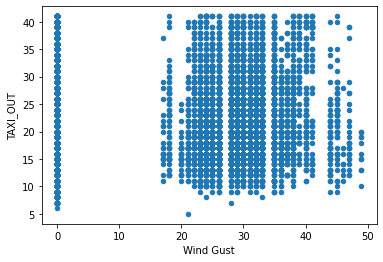

In [49]:
df_num.plot(kind='scatter', x='Wind Gust', y='TAXI_OUT')

In [50]:
y = df['TAXI_OUT']

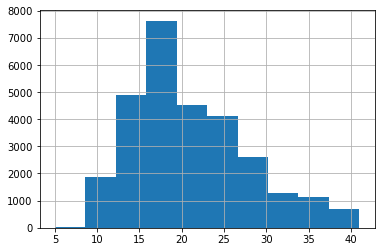

In [52]:
y.hist();

In [54]:
y.unique()

array([14, 15, 22, 12, 13, 21, 26, 11, 25, 29, 30, 24, 17, 16, 18, 34, 23,
       19, 20, 10, 36, 28, 27, 35,  9, 37, 39,  7, 31, 38, 40, 32, 41, 33,
        5,  8,  6])

# Machine Learning

## Preprocessing

In [57]:
X = df_num.drop('TAXI_OUT', axis=1)
y = df['TAXI_OUT']

### Standard Scaler

In [65]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scale = scaler.fit_transform(X)
y_scale = scaler.fit_transform(np.array(y).reshape(-1,1))
X_scale.shape

(28818, 16)

## Model

In [96]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor


def model_run(X, y):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
    
    estimator = DecisionTreeRegressor()
    estimator.fit(X_train, y_train)
    
    y_pred = estimator.predict(X_test)
    scr = estimator.score(X_test, y_test)
    print(estimator.__class__.__name__)
    print('score = {:.1%}'.format(scr))
    plt.scatter(y_test, y_pred)
    plt.show();
    print(' ')

DecisionTreeRegressor
score = 24.5%


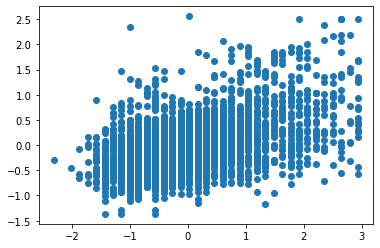

In [97]:
model_run(X_scale, y_scale)

In [98]:
X.head()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,DEP_TIME_M,CRS_ARR_M,Temperature,Humidity,Wind Speed,Wind Gust,Pressure,sch_dep,sch_arr
0,11,1,5,-1,124,636,324,323,448,48,58,25,38,29.86,9,17
1,11,1,5,-7,371,2475,340,333,531,48,58,25,38,29.86,9,17
2,11,1,5,40,181,1069,301,341,482,48,58,25,38,29.86,9,17
3,11,1,5,-2,168,944,345,343,513,48,58,25,38,29.86,9,17
4,11,1,5,-4,139,760,360,356,499,46,58,24,35,29.91,9,17


DecisionTreeRegressor
score = 27.0%


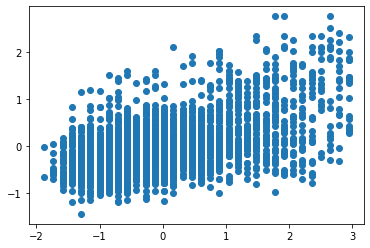

In [105]:
cols = ['Temperature', 'Humidity', 'Wind Speed', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'Wind Gust']
scaler = StandardScaler()
X_scale = scaler.fit_transform(X[cols])
X_scale.shape

model_run(X_scale, y_scale)

### Feature Selection RFE 

In [121]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_selection import RFE, RFECV

scaler = StandardScaler()
X_scale = scaler.fit_transform(X)

selector = RFECV(DecisionTreeRegressor(), step=2, min_features_to_select=3, cv=3)
selector.fit_transform(X_scale,y_scale)
#np.array(X.columns)[selector.get_support()]
selector.get_support()

array([False, False, False,  True,  True, False, False,  True,  True,
        True,  True, False, False,  True,  True, False])

In [122]:
np.array(X.columns)[selector.get_support()]

array(['DEP_DELAY', 'CRS_ELAPSED_TIME', 'DEP_TIME_M', 'CRS_ARR_M',
       'Temperature', 'Humidity', 'Pressure', 'sch_dep'], dtype=object)

DecisionTreeRegressor
score = -52.9%


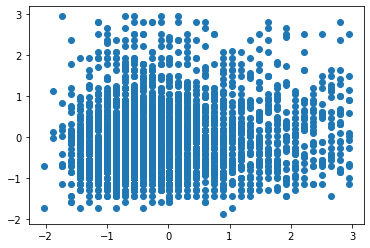

In [131]:
cols = ['CRS_ARR_M', 'Temperature']
scaler = StandardScaler()
X_scale = scaler.fit_transform(X[cols])
X_scale.shape

model_run(X_scale, y_scale)

In [127]:
corr_matrix = df_num.corr()
corr_matrix['TAXI_OUT'].sort_values(ascending=False)

TAXI_OUT            1.000000
sch_dep             0.190374
Wind Gust           0.095764
CRS_ARR_M           0.071524
CRS_ELAPSED_TIME    0.071007
sch_arr             0.064193
Wind Speed          0.062942
DISTANCE            0.060006
DEP_TIME_M          0.057584
CRS_DEP_M           0.044562
DEP_DELAY           0.034759
DAY_OF_WEEK         0.028397
MONTH               0.018347
DAY_OF_MONTH       -0.024065
Humidity           -0.026811
Pressure           -0.059530
Temperature        -0.067171
Name: TAXI_OUT, dtype: float64

DecisionTreeRegressor
score = 24.8%


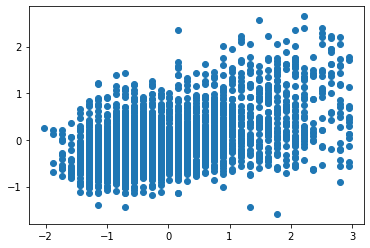

In [148]:
cols = ['Temperature', 'Humidity', 'Wind Speed', 'DAY_OF_WEEK', 'Wind Gust', 'Pressure', 'DAY_OF_MONTH']
scaler = StandardScaler()
X_scale = scaler.fit_transform(X[cols])
X_scale.shape

model_run(X_scale, y_scale)

DecisionTreeRegressor
score = 28.6%


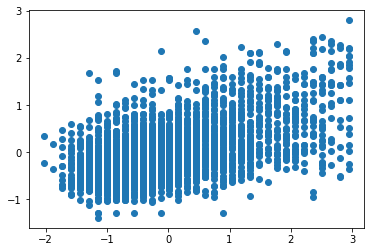

In [149]:
cols = ['Temperature', 'Humidity', 'Wind Speed', 'Wind Gust', 'Pressure']
scaler = StandardScaler()
X_scale = scaler.fit_transform(X[cols])
X_scale.shape

model_run(X_scale, y_scale)

In [157]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score


def model_run_cv(X, y):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
    
    estimator = DecisionTreeRegressor()    
    scr = cross_val_score(estimator, X_train, y_train, cv=5).mean()
    
    print('score = {:.0%}'.format(scr))

In [167]:
cols = ['Temperature', 'Humidity', 'Wind Speed', 'Wind Gust', 'Pressure']
scaler = StandardScaler()
X_scale = scaler.fit_transform(X[cols])
X_scale.shape

model_run_cv(X_scale, y_scale)

score = 23%


In [ ]:
cols = ['Temperature', 'Humidity', 'Wind Speed', 'Wind Gust', 'Pressure', '']
scaler = StandardScaler()
X_scale = scaler.fit_transform(X[cols])
X_scale.shape

model_run_cv(X_scale, y_scale)